In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
sb.set(style="whitegrid")

In [3]:
df = pd.read_csv("lab4_Dataset.csv")
df.head()

,Date,Product,Category,Units Sold,Unit Price,Revenue,Region
0,2024-11-15,Widget A,Widgets,2,76.74,153.48,South
1,2024-12-14,Widget B,Widgets,9,76.28,686.52,North
2,2025-01-29,Tool E,Tools,28,12.86,360.08,North
3,2025-01-29,Widget B,Widgets,15,55.48,832.20,North
4,2025-01-19,Tool E,Tools,13,74.44,967.72,West


In [4]:
df.isnull().sum()

Date          0
Product       0
Category      0
Units Sold    0
Unit Price    0
Revenue       0
Region        0
dtype: int64

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Revenue'] = pd.to_numeric(df['Revenue'], errors = 'coerce')

In [6]:
total_revenue = df['Revenue'].sum()
print(total_revenue)

1410665.6400000001


In [7]:
print(df['Category'].value_counts())

Category
Gadgets    415
Widgets    391
Tools      194
Name: count, dtype: int64


In [8]:
print(df.groupby('Product')['Revenue'].mean())

Product
Gadget C    1361.151081
Gadget D    1320.328601
Tool E      1543.924742
Widget A    1393.795421
Widget B    1439.423632
Name: Revenue, dtype: float64


In [9]:
print(df.groupby('Region')['Revenue'].sum())

Region
East     385439.41
North    313377.87
South    336279.77
West     375568.59
Name: Revenue, dtype: float64


In [10]:
region_sales = df.groupby('Region')['Revenue'].sum()
region_sales

Region
East     385439.41
North    313377.87
South    336279.77
West     375568.59
Name: Revenue, dtype: float64

In [12]:
print(region_sales.idxmax())

East


C:\Users\Siddd\AppData\Local\Temp\ipykernel_21460\1357732888.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x = 'Product', y = 'Revenue',


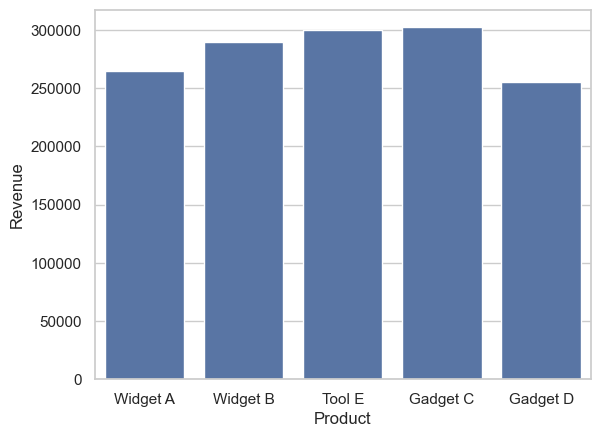

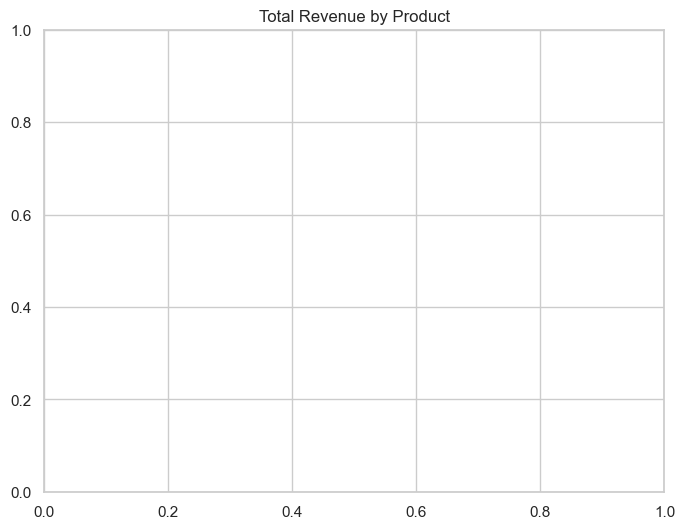

In [14]:
sb.barplot(x = 'Product', y = 'Revenue', 
           data = df, estimator = sum, ci = None)
plt.figure(figsize=(8,6))
plt.title('Total Revenue by Product')
plt.show()



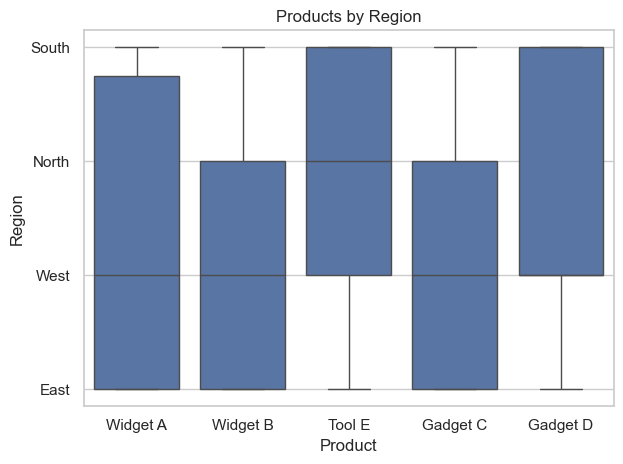

In [15]:
sb.boxplot(data = df, x = "Product", y = "Region")
plt.title("Products by Region")
plt.tight_layout()
plt.show()

In [16]:
def summarize_category(df, category):
    return df[df['Category'] == category].describe()

In [17]:
summarize_category(df, 'Widgets')

,Date,Units Sold,Unit Price,Revenue
count,391,391.000000,391.000000,391.000000
mean,2025-01-31 22:35:17.647058944,25.189258,54.928159,1417.251355
min,2024-11-02 00:00:00,1.000000,10.370000,11.150000
25%,2024-12-15 00:00:00,13.000000,32.440000,460.175000
50%,2025-02-02 00:00:00,25.000000,53.250000,1098.760000
75%,2025-03-18 00:00:00,38.000000,77.135000,2031.740000
max,2025-05-03 00:00:00,50.000000,99.960000,4798.080000
std,NaN,14.741012,25.657949,1151.606719
